In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('jobs_in_data.csv')

## EXPLORATORY DATA ANALYSIS

**Job trends over time by job category**

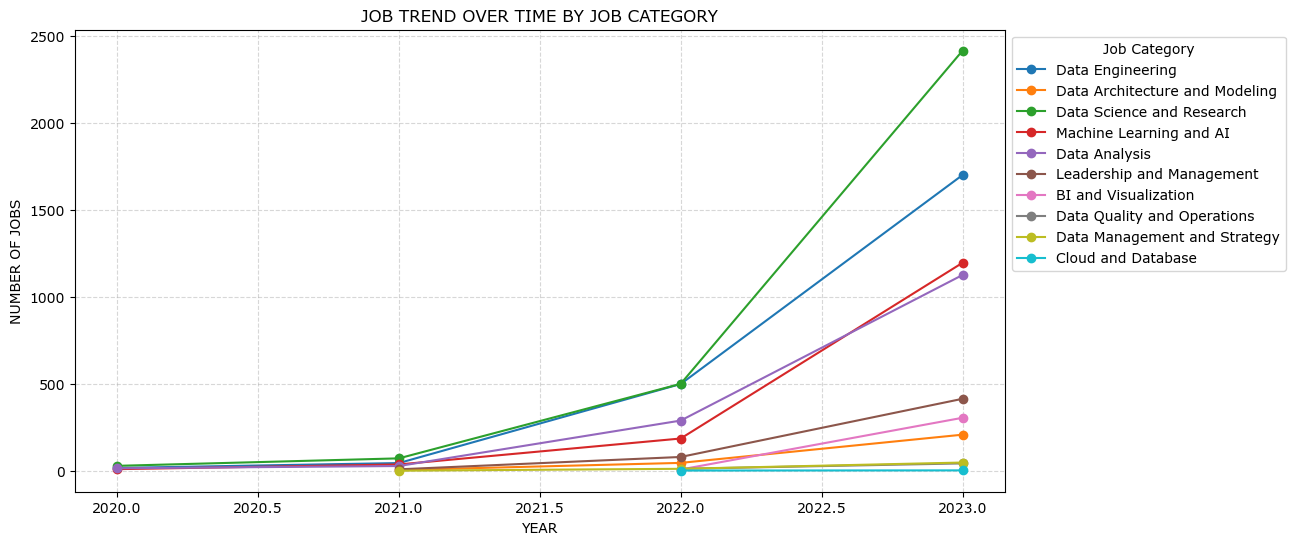

In [3]:
job_categories = df['job_category'].unique()

plt.figure(figsize=(12,6))

for category in job_categories:
    category_data = df[df['job_category']==category]
    category_trend = category_data.groupby(by='work_year')['job_category'].count()
    plt.plot(category_trend,marker='o',label=category)

plt.title('JOB TREND OVER TIME BY JOB CATEGORY')
plt.legend(title='Job Category',loc='upper left',bbox_to_anchor=(1,1))
plt.xlabel('YEAR')
plt.ylabel('NUMBER OF JOBS')
plt.grid(axis='both',ls='--',alpha=0.5)

*Post 2021, jobs involved in Data Science started surging which skyrockted after 2022*

**Let's try to understand the number of records obtained from each location and their weightage in the overall data**

In [4]:
loc_counts = pd.DataFrame(df[['company_location','employee_residence']].value_counts())

In [5]:
loc_counts['%_of_total'] = round(loc_counts['count']*100/loc_counts.values.sum(),2)

In [6]:
loc_counts.head()

,,count,%_of_total
company_location,employee_residence,,
United States,United States,8080,86.37
United Kingdom,United Kingdom,441,4.71
Canada,Canada,220,2.35
Spain,Spain,111,1.19
Germany,Germany,61,0.65


In [7]:
print(loc_counts['%_of_total'].values[0])

86.37


*86.37% of the data obtained was either from US based employers or US based employees.*

**So our focus will be on US related data and summarize the number of records in each available year**

In [8]:
us_data = df[(df['company_location']=='United States') | (df['employee_residence']=='United States')].reset_index(drop=True)

In [9]:
us_rec_count = pd.DataFrame(us_data['work_year'].value_counts())

In [10]:
us_rec_count['%_of_total'] = round(us_rec_count['count']*100/us_rec_count.values.sum(),2)

In [11]:
us_rec_count

,count,%_of_total
work_year,,
2023,6665,81.90
2022,1341,16.48
2021,99,1.22
2020,33,0.41


In [12]:
print(round(us_rec_count['%_of_total'].values[0]+us_rec_count['%_of_total'].values[1],2))

98.38


*98.38% of the data was obtained in the past 2 years*

**Disecting the number of jobs in US per year, per job category**

In [13]:
us_data[['work_year','job_category']].value_counts().unstack().fillna(0)

job_category,BI and Visualization,Cloud and Database,Data Analysis,Data Architecture and Modeling,Data Engineering,Data Management and Strategy,Data Quality and Operations,Data Science and Research,Leadership and Management,Machine Learning and AI
work_year,,,,,,,,,,
2020,0.0,0.0,8.0,0.0,6.0,0.0,0.0,15.0,0.0,4.0
2021,0.0,0.0,19.0,4.0,26.0,1.0,0.0,29.0,5.0,15.0
2022,4.0,2.0,243.0,44.0,418.0,11.0,12.0,410.0,68.0,129.0
2023,285.0,3.0,983.0,189.0,1528.0,44.0,38.0,2183.0,369.0,1043.0


*% Growth (2022-2023)*

- BI and Visualization: 7025%
- Data Analysis: 304.5%
- Data Engineering: 265.5%
- Data Science and Research: 432%
- Machine Learning and AI: 708.5%

## STATISTICAL ANALYSIS


**Understanding the correlation between salary, experience, work setting and employment type**

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [15]:
us_data['experience'] = label_encoder.fit_transform(us_data['experience_level'])
us_data['work_set'] = label_encoder.fit_transform(us_data['work_setting'])
us_data['emp_type'] = label_encoder.fit_transform(us_data['employment_type'])

In [16]:
year1 = us_data[us_data['work_year']==2020]
year2 = us_data[us_data['work_year']==2021]
year3 = us_data[us_data['work_year']==2022]
year4 = us_data[us_data['work_year']==2023]

Text(0.5, 1.0, 'Salary Correlation in 2023')

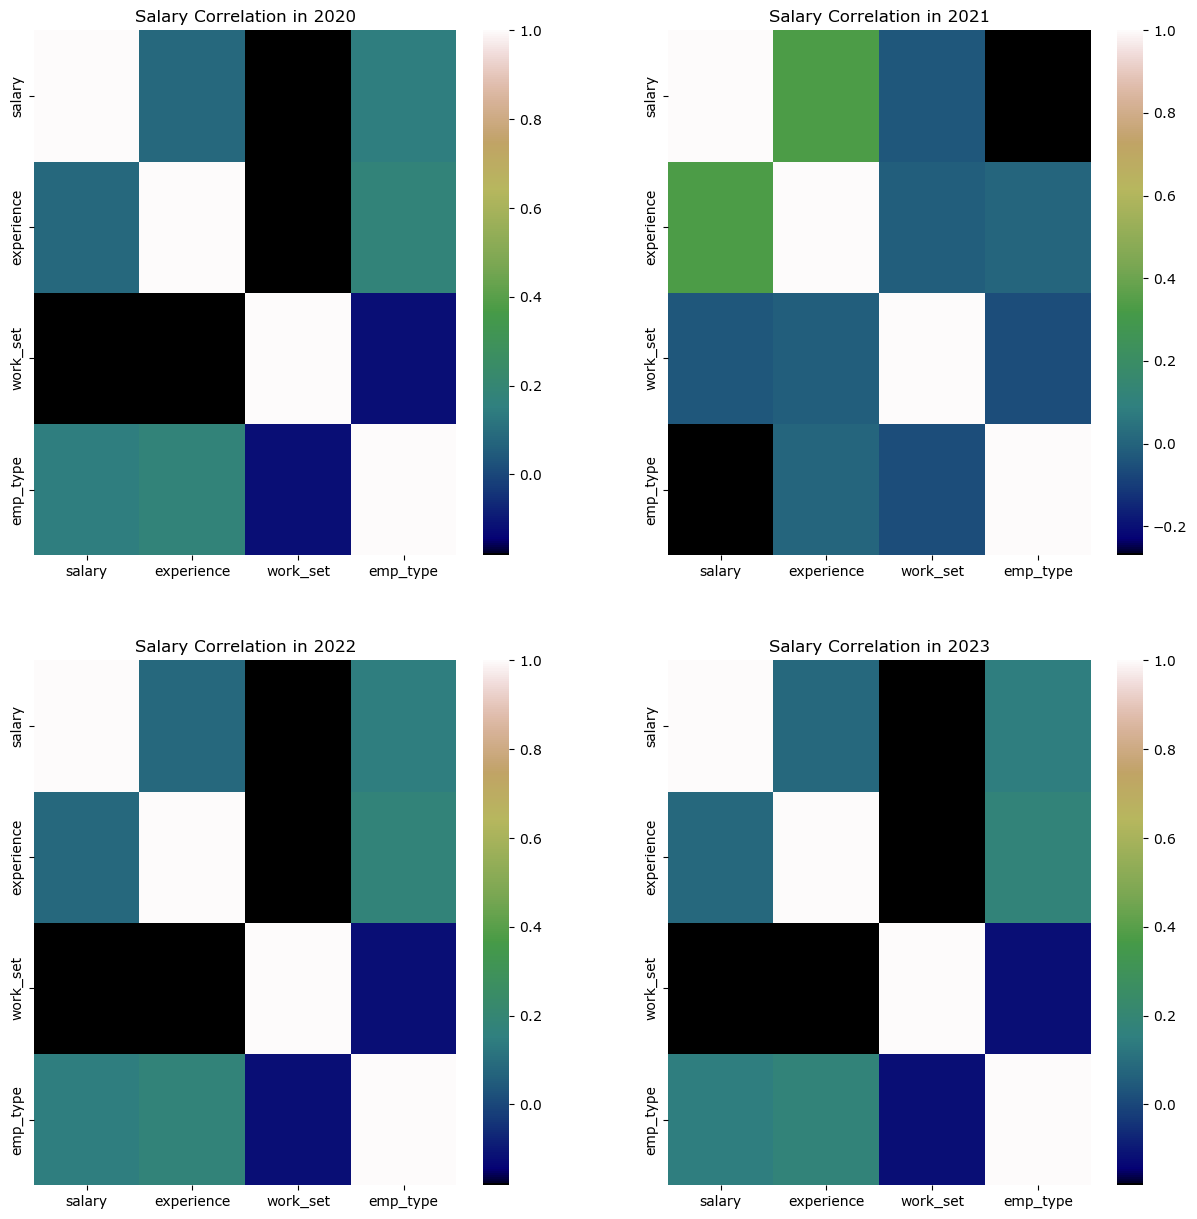

In [17]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.heatmap(year1[['salary','experience','work_set','emp_type']].corr(), cmap='gist_earth')
plt.title('Salary Correlation in ' + str(year1['work_year'].values[0]))

plt.subplot(2,2,2)
sns.heatmap(year2[['salary','experience','work_set','emp_type']].corr(), cmap='gist_earth')
plt.title('Salary Correlation in ' + str(year2['work_year'].values[0]))

plt.subplot(2,2,3)
sns.heatmap(year1[['salary','experience','work_set','emp_type']].corr(), cmap='gist_earth')
plt.title('Salary Correlation in ' + str(year3['work_year'].values[0]))

plt.subplot(2,2,4)
sns.heatmap(year1[['salary','experience','work_set','emp_type']].corr(), cmap='gist_earth')
plt.title('Salary Correlation in ' + str(year4['work_year'].values[0]))

*Salary has a positive correlation with Experience and Employment Type*

**Plotting the median salary by job category and work setting**

In [18]:
j_cat = us_data.groupby(['job_category','work_setting'])['salary'].median().unstack().fillna(0).sort_index()

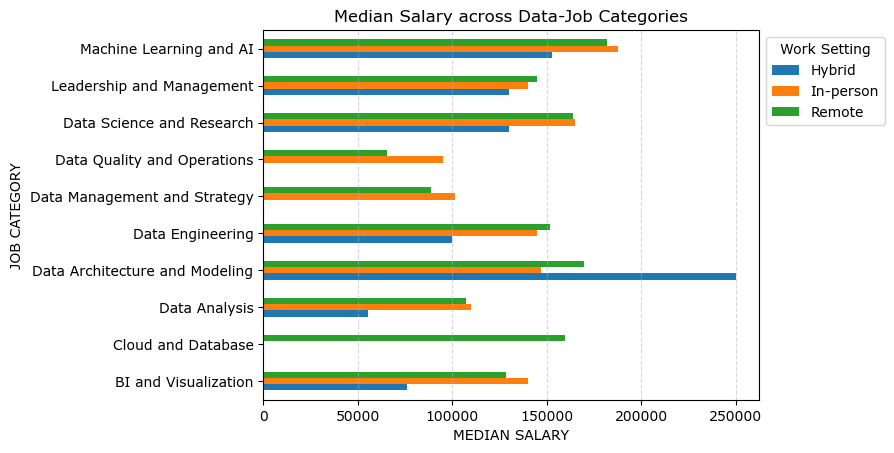

In [19]:
j_cat.plot(kind='barh')
plt.title('Median Salary across Data-Job Categories')
plt.legend(title='Work Setting', loc= 'upper left', bbox_to_anchor = (1,1))
plt.xlabel('MEDIAN SALARY')
plt.ylabel('JOB CATEGORY')
plt.grid(axis='x',alpha=0.5,ls='--')

*Data Architecture and Modeling Professionals working in a hybrid set up have the highest median salary*

**Salary by employment type, experience level and work setting**

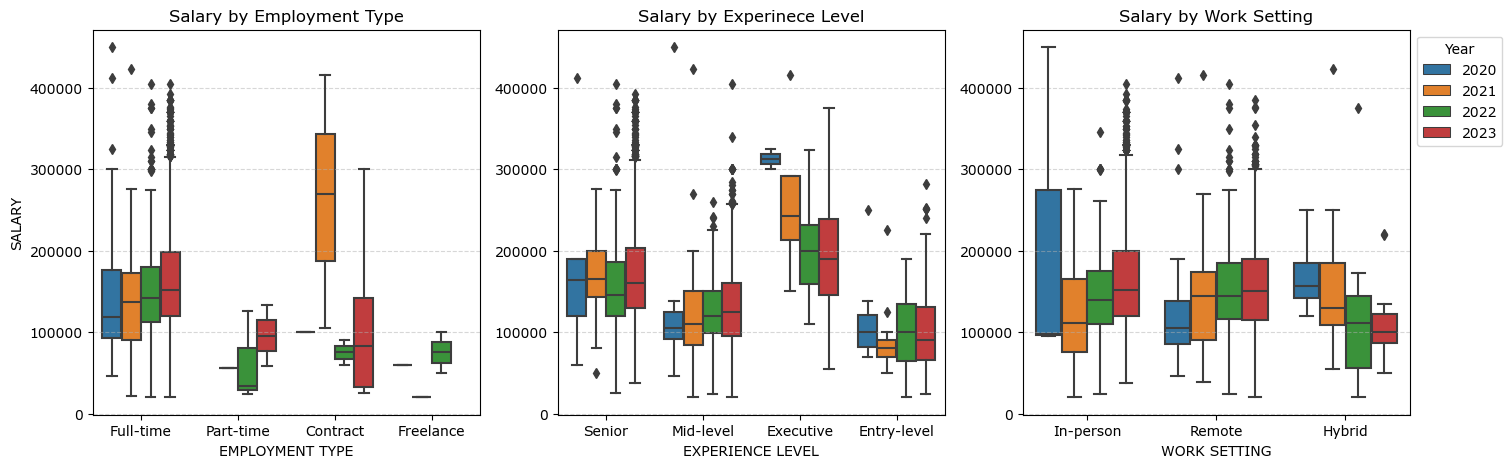

In [20]:
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.boxplot(data=us_data,x='employment_type',y='salary',hue='work_year')
plt.xlabel('EMPLOYMENT TYPE')
plt.ylabel('SALARY')
plt.title('Salary by Employment Type')
plt.legend().remove()
plt.grid(axis='y',ls='--',alpha=0.5)

plt.subplot(1,3,2)
sns.boxplot(data=us_data,x='experience_level',y='salary',hue='work_year')
plt.xlabel('EXPERIENCE LEVEL')
plt.ylabel(' ')
plt.title('Salary by Experinece Level')
plt.legend().remove()
plt.grid(axis='y',ls='--',alpha=0.5)

plt.subplot(1,3,3)
sns.boxplot(data=us_data,x='work_setting',y='salary',hue='work_year')
plt.xlabel('WORK SETTING')
plt.ylabel(' ')
plt.title('Salary by Work Setting')
plt.legend(title='Year',loc='upper left',bbox_to_anchor=(1,1))
plt.grid(axis='y',ls='--',alpha=0.5)

*Given the significant impact of experience level on salary and the majority of respondents being full-time employees, our focus shifts to examining the salary distribution among full-time employees over the last two years. Since approximately 99% of the data falls within this timeframe, it enables a more meaningful and relevant trend analysis*

In [21]:
recent_year = us_data['work_year'].max()
previous_year = us_data['work_year'].max()-1
emp = 'Full-time'

In [22]:
present = us_data[(us_data['work_year']==recent_year) & (us_data['employment_type']==emp)]
past = us_data[(us_data['work_year']==previous_year) & (us_data['employment_type']==emp)]

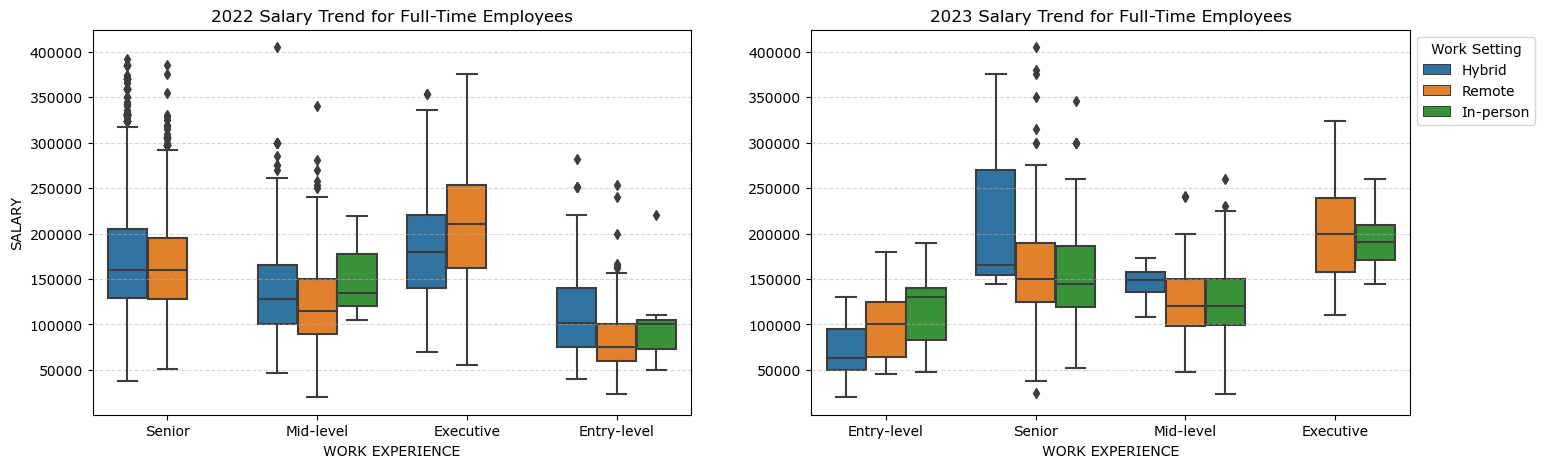

In [23]:
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
sns.boxplot(data=present,x='experience_level',y='salary',hue='work_setting')
plt.title(str(previous_year) + ' Salary Trend for Full-Time Employees')
plt.xlabel('WORK EXPERIENCE')
plt.ylabel('SALARY')
plt.legend().remove()
plt.grid(axis='y',ls='--',alpha=0.5)

plt.subplot(1,2,2)
sns.boxplot(data=past,x='experience_level',y='salary',hue='work_setting')
plt.title(str(recent_year) + ' Salary Trend for Full-Time Employees')
plt.xlabel('WORK EXPERIENCE')
plt.ylabel(' ')
plt.legend(title='Work Setting',loc='upper left',bbox_to_anchor=(1,1))
plt.grid(axis='y',ls='--',alpha=0.5)

*Professionals at the senior or executive levels of work experience enjoy the highest salary range.*

**Presenting the data in tabular form for an in depth analysis**

In [24]:
temp_df = pd.concat([present,past])

In [25]:
new_df = temp_df.groupby(by=['employment_type','work_year','experience_level','work_setting'])['salary'].mean().unstack(1).round(2)

In [26]:
new_df.rename(columns={2022:'salary_in_2022',2023:'salary_in_2023'},inplace=True)

In [27]:
new_df.rename_axis(columns={'work_year':' '},inplace=True)

In [28]:
new_df['%_change'] = round((new_df['salary_in_2023']-new_df['salary_in_2022'])*100/new_df['salary_in_2023'],2)

In [29]:
import warnings

warnings.filterwarnings('ignore',category=FutureWarning)

new_df.fillna('NA',inplace=True)

warnings.resetwarnings()

In [30]:
new_df

salary_in_2022 salary_in_2023  \
employment_type experience_level work_setting                                  
Full-time       Entry-level      Hybrid              71900.00      103785.71   
                                 In-person          117612.90      111735.65   
                                 Remote             101647.83       87796.12   
                Executive        In-person          193800.00      183248.39   
                                 Remote             202543.52      209268.11   
                Mid-level        Hybrid             144750.00       153000.0   
                                 In-person          125121.51      135083.48   
                                 Remote             122982.47      120715.86   
                Senior           Hybrid             228000.00             NA   
                                 In-person          151273.94      171227.13   
                                 Remote             154958.71      163351.24   

                                              %_change  
employment_type experience_level work_setting           
Full-time       Entry-level      Hybrid          30.72  
                                 In-person       -5.26  
                                 Remote         -15.78  
                Executive        In-person       -5.76  
                                 Remote           3.21  
                Mid-level        Hybrid           5.39  
                                 In-person        7.37  
                                 Remote          -1.88  
                Senior           Hybrid             NA  
                                 In-person       11.65  
                                 Remote           5.14

## The End